# Arrest Data Review
## Review general trends of the entire data set.
## Review one arrest type and explore some factors like gender, age, etc. to see if trends exist.

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv (r'\\Flws-ntxfs\cfr\CPierson\Documents\Python\NYPD_Arrest_Data__Year_to_Date_.csv')

In [2]:
df.shape

(155507, 19)

In [3]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [4]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         29
PD_DESC                      103
KY_CD                        103
OFNS_DESC                    103
LAW_CODE                       0
LAW_CAT_CD                  1393
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [5]:
## There are not a lot of null values in the description column so dropping them will not impact my data too much.
## Since I am selecting data to review by type of arrest I do not want null values.
df = df.dropna(subset=['OFNS_DESC'])
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                          0
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1393
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [6]:
df.shape

(155404, 19)

In [7]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.554040e+05,155404.000000,155404.000000,155404.000000,155404.000000,1.554040e+05,155404.000000,155404.000000,155404.000000
mean,2.304659e+08,407.763983,244.962974,62.849663,0.912943,1.004995e+06,208164.073331,40.737996,-73.925116
std,4.627963e+06,275.773046,150.334545,35.258131,7.896784,2.152876e+04,29905.995347,0.082090,0.077640
min,2.224711e+08,15.000000,101.000000,1.000000,0.000000,9.142140e+05,121312.000000,40.499401,-74.251844
25%,2.263269e+08,113.000000,111.000000,34.000000,0.000000,9.912230e+05,185906.750000,40.676902,-73.974842
50%,2.306064e+08,339.000000,235.000000,62.000000,0.000000,1.004224e+06,207067.000000,40.735019,-73.927979
75%,2.344524e+08,705.000000,344.000000,101.000000,0.000000,1.017119e+06,235804.000000,40.813903,-73.881512
max,2.385139e+08,997.000000,995.000000,123.000000,97.000000,1.066928e+06,271820.000000,40.912723,-73.701612


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155404 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155404 non-null  int64  
 1   ARREST_DATE               155404 non-null  object 
 2   PD_CD                     155404 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155404 non-null  object 
 7   LAW_CAT_CD                154011 non-null  object 
 8   ARREST_BORO               155404 non-null  object 
 9   ARREST_PRECINCT           155404 non-null  int64  
 10  JURISDICTION_CODE         155404 non-null  int64  
 11  AGE_GROUP                 155404 non-null  object 
 12  PERP_SEX                  155404 non-null  object 
 13  PERP_RACE                 155404 non-null  o

In [9]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
5,234117071,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK,989013,192652,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)


In [10]:
##Most crimes are committed by people between 25 - 44
df.groupby(['AGE_GROUP'])['ARREST_KEY'].count()

AGE_GROUP
18-24    28927
25-44    88787
45-64    30595
65+       2296
<18       4799
Name: ARREST_KEY, dtype: int64

In [11]:
##Most crimes were committed in Brooklyn
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    41524
M    39647
B    34001
Q    33023
S     7209
Name: ARREST_KEY, dtype: int64

In [12]:
##Men commit more crimes than women
df.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_SEX
M    128817
F     26587
Name: ARREST_KEY, dtype: int64

In [14]:
##New Yorkers like holidays. Thanksgiving, Christmas Eve and Christmas Day are in the lowest 4 days for number of arrests. 
df.groupby(['ARREST_DATE'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_DATE
09/21/2021    701
10/13/2021    682
11/17/2021    649
10/06/2021    640
01/06/2021    634
             ... 
04/26/2021    230
12/24/2021    212
11/25/2021    194
12/25/2021    181
02/01/2021    139
Name: ARREST_KEY, Length: 365, dtype: int64

In [15]:
##Adding column for arrest month (number) to be able to make visualizations later.
df['ARREST_MONTH'] = pd.DatetimeIndex(df['ARREST_DATE']).month
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,ARREST_MONTH
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002),12
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007),11
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005),10
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008),10
5,234117071,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK,989013,192652,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006),9


In [16]:
##Adding full borough name as its own column for easier reading
def borough(row):
    if row['ARREST_BORO'] == 'M':
        return 'Manhattan'
    elif row['ARREST_BORO'] == 'K':
        return 'Brooklyn'
    elif row['ARREST_BORO'] == 'Q':
        return 'Queens'
    elif row['ARREST_BORO'] == 'B':
        return 'Bronx'
    elif row['ARREST_BORO'] == 'S':
        return 'Staten Island'
    else:
        return 'Other'
    
df['ARREST_BOROUGH_NAME'] = df.apply(lambda row: borough(row), axis=1)

In [17]:
# As this is converted, it is still needed to be sortable
order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

##Adding Arrest Month by name. I am sure there is an easier way to do this but I couldn't figure it out.
def month_name(row):
    if row['ARREST_MONTH'] == 1:
        return 'Jan'
    elif row['ARREST_MONTH'] == 2:
        return 'Feb'
    elif row['ARREST_MONTH'] == 3:
        return 'Mar'
    elif row['ARREST_MONTH'] == 4:
        return 'Apr'
    elif row['ARREST_MONTH'] == 5:
        return 'May'
    elif row['ARREST_MONTH'] == 6:
        return 'Jun'
    elif row['ARREST_MONTH'] == 7:
        return 'Jul'
    elif row['ARREST_MONTH'] == 8:
        return 'Aug'
    elif row['ARREST_MONTH'] == 9:
        return 'Sep'
    elif row['ARREST_MONTH'] == 10:
        return 'Oct'
    elif row['ARREST_MONTH'] == 11:
        return 'Nov'
    elif row['ARREST_MONTH'] == 12:
        return 'Dec'
    else:
        return 'Other'
    
df['ARREST_MONTH_NAME'] = df.apply(lambda row: month_name(row), axis=1)

In [18]:
##Making sure new columns are there
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,ARREST_MONTH,ARREST_BOROUGH_NAME,ARREST_MONTH_NAME
155502,222884924,01/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,46,...,M,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035),1,Bronx,Jan
155503,223918625,02/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,...,M,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005),2,Brooklyn,Feb
155504,224323770,02/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,...,M,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074),2,Staten Island,Feb
155505,222599533,01/04/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,73,...,M,BLACK,1007524,188555,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044),1,Brooklyn,Jan
155506,224056881,02/06/2021,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1451000,F,Q,102,...,M,ASIAN / PACIFIC ISLANDER,1031414,190787,40.690226,-73.829932,POINT (-73.82993153599993 40.69022556600004),2,Queens,Feb


In [19]:
##Reviewing Number of Arrests by arrest type. Most are misdemeanors.
df.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=False)

LAW_CAT_CD
M    82575
F    70821
V      385
I      230
Name: ARREST_KEY, dtype: int64

In [20]:
##Exploring types of crime
df.groupby(['PD_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

PD_DESC
ASSAULT 3                         19766
LARCENY,PETIT FROM OPEN AREAS,    13143
ASSAULT 2,1,UNCLASSIFIED          11663
ROBBERY,OPEN AREA UNCLASSIFIED     7809
PUBLIC ADMINISTRATION,UNCLASSI     7135
                                  ...  
GAMBLING 2, PROMOTING, POLICY-        1
FIREWORKS PREV CONV 5 YEARS           1
FALSE REPORT 1,FIRE                   1
FAIL TO SIGNAL                        1
WOUNDS,REPORTING OF                   1
Name: ARREST_KEY, Length: 241, dtype: int64

In [21]:
df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES       26855
FELONY ASSAULT                     15579
PETIT LARCENY                      13178
DANGEROUS DRUGS                    10450
MISCELLANEOUS PENAL LAW            10328
                                   ...  
PARKING OFFENSES                       3
FELONY SEX CRIMES                      2
ADMINISTRATIVE CODES                   2
NEW YORK CITY HEALTH CODE              1
KIDNAPPING AND RELATED OFFENSES        1
Name: ARREST_KEY, Length: 63, dtype: int64

In [25]:
##I selected assault crimes to review in further detail. 
## Creating data set for just assaults.
df_assault = df[df['OFNS_DESC'].str.contains('ASSAULT')]
df_assault.groupby(['OFNS_DESC'])['ARREST_KEY'].count()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    26855
FELONY ASSAULT                  15579
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Number of Assaults By Gender')

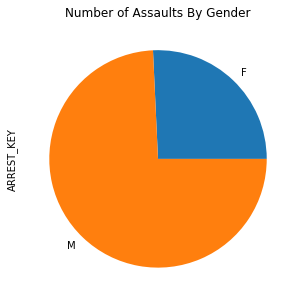

In [80]:
## Most assaults are committed by men
df_assault_gender = df_assault.groupby(['PERP_SEX'])['ARREST_KEY'].count()
df_assault_gender.plot.pie()
plt.title("Number of Assaults By Gender")

Text(0.5, 1.0, 'Number of Crimes By Gender')

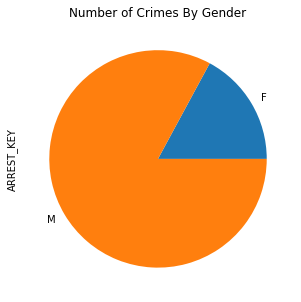

In [85]:
## Comparing Assaults to rest of data set. Women make up a larger percentage of assaults compared to overall crime.
df_gender = df.groupby(['PERP_SEX'])['ARREST_KEY'].count()
df_gender.plot.pie()
plt.title("Number of Crimes By Gender")

Text(0.5, 1.0, 'Number of Assaults By Law Category')

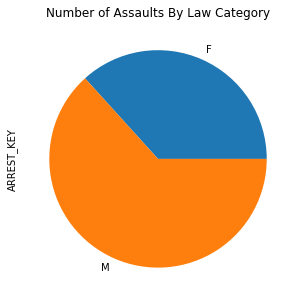

In [83]:
##Most assaults are misdemeanors
df_assault_level = df_assault.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count()
df_assault_level.plot.pie()
plt.title("Number of Assaults By Law Category")

In [29]:
## There is not a big difference between the months.
## February is the lowest, October is the highest.
df_assault.groupby(['ARREST_MONTH'])['ARREST_KEY'].count()

ARREST_MONTH
1     3273
2     2932
3     3601
4     3041
5     3456
6     3582
7     3877
8     3822
9     3825
10    4025
11    3598
12    3402
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Number of Assaults by Month')

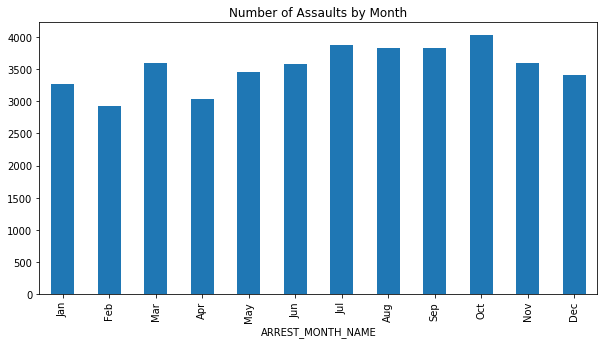

In [88]:
df_assault.groupby(by='ARREST_MONTH_NAME')['ARREST_KEY'].count().reindex(order).plot(kind="bar")
plt.title("Number of Assaults by Month")

Text(0.5, 1.0, 'Number of Assaults by Month and Gender')

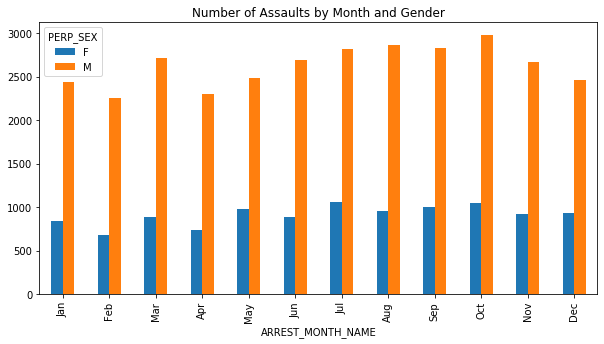

In [91]:
##Visualization of Arrest Month for Assaults Comparing the Genders
Assault_Month_Gender = pd.pivot_table(df_assault,values="ARREST_KEY",index="ARREST_MONTH_NAME",columns="PERP_SEX",aggfunc=len).reindex(order)
Assault_Month_Gender.plot.bar()
plt.title("Number of Assaults by Month and Gender")

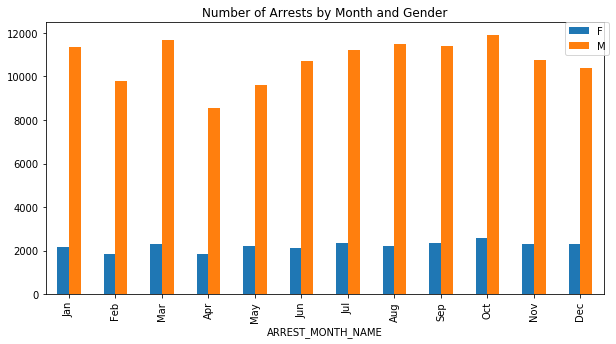

In [93]:
##Comparing Assaults vs the rest of the data set. The patterns are almost identical. 
##Assaults follow the same trend as all crimes put together
Arrest_Month_Gender = pd.pivot_table(df,values="ARREST_KEY",index="ARREST_MONTH_NAME",columns="PERP_SEX",aggfunc=len).reindex(order)
Arrest_Month_Gender.plot.bar()
plt.title("Number of Arrests by Month and Gender")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

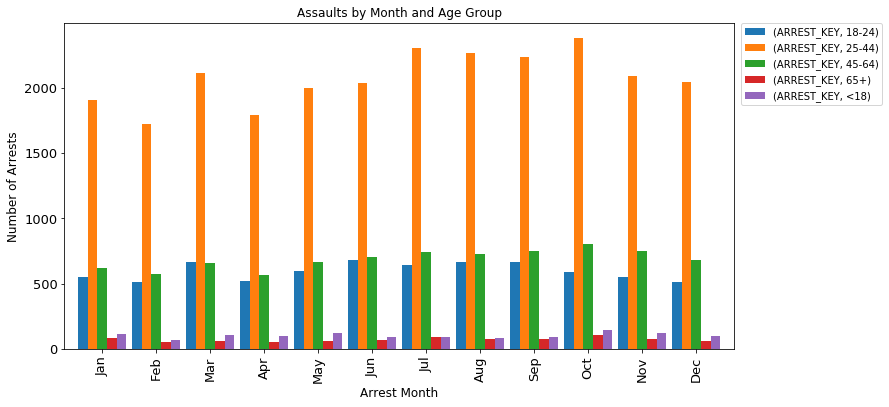

In [94]:
Assault_Month_Age = pd.pivot_table(df_assault,values=["ARREST_KEY"],index="ARREST_MONTH_NAME",columns="AGE_GROUP",aggfunc=len)
Assault_Month_Age = Assault_Month_Age.reindex(order)
ax = Assault_Month_Age.plot(kind='bar', figsize=(12,6), fontsize=13, width=0.9)
ax.set_title("Assaults by Month and Age Group")
ax.set_xlabel("Arrest Month", fontsize=12)
ax.set_ylabel("Number of Arrests", fontsize=12)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

## Comparing Assaults vs the rest of the data set. The patterns are similar. 
### There are a few months that young people (18-24) seem to commit more crimes overall but less assaults in comparison to 45-64 year olds. (January, February, March). In general, the pattern is similar to overall crime.

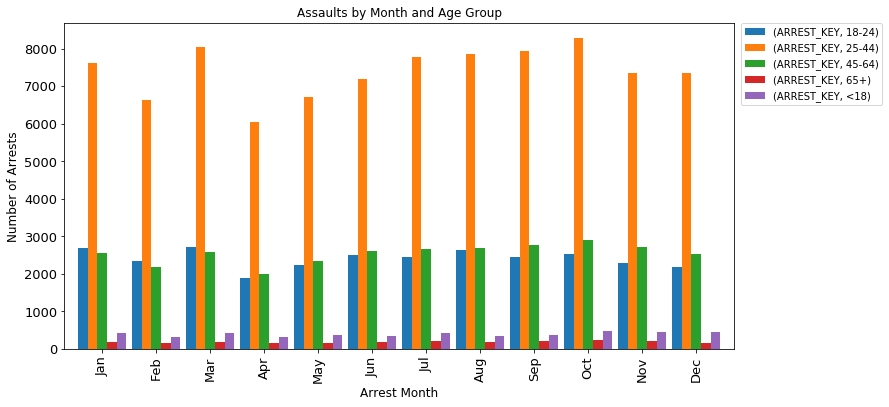

In [97]:
Arrest_Month_Age = pd.pivot_table(df,values=["ARREST_KEY"],index="ARREST_MONTH_NAME",columns="AGE_GROUP",aggfunc=len)
Arrest_Month_Age = Arrest_Month_Age.reindex(order)
ax = Arrest_Month_Age.plot(kind='bar', figsize=(12,6), fontsize=13, width=0.9)
ax.set_title("Assaults by Month and Age Group")
ax.set_xlabel("Arrest Month", fontsize=12)
ax.set_ylabel("Number of Arrests", fontsize=12)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

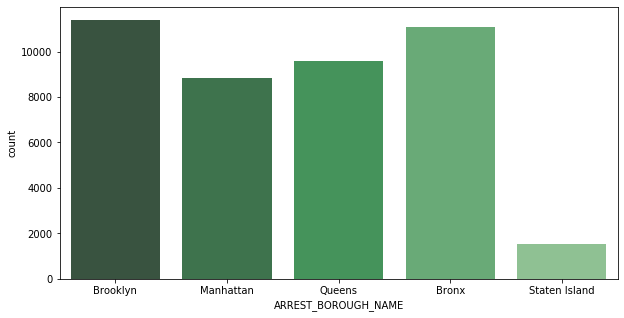

In [102]:
##Visualization of Assaults by Borough
sns.countplot(x="ARREST_BOROUGH_NAME",data=df_assault,palette="Greens_d")

Text(0, 0.5, 'Number of Arrests')

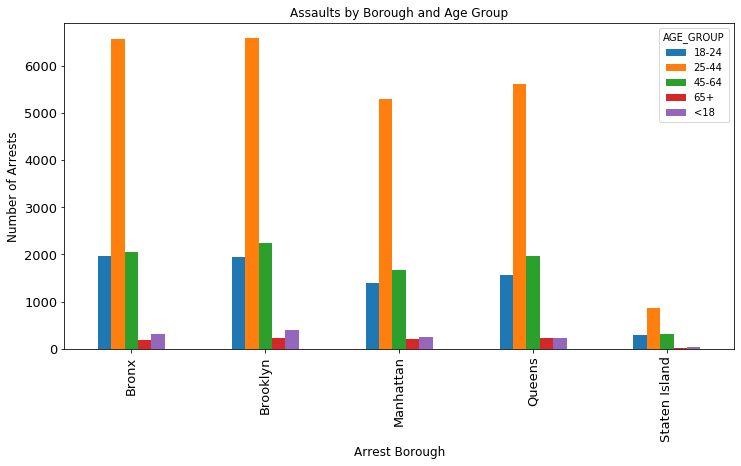

In [99]:
## Visualization comparing borough and age group
Assault_Borough_Age = pd.pivot_table(df_assault,values="ARREST_KEY",index="ARREST_BOROUGH_NAME",columns="AGE_GROUP",aggfunc=len)
ax = Assault_Borough_Age.plot(kind='bar', figsize=(12,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Assaults by Borough and Age Group")
ax.set_xlabel("Arrest Borough", fontsize=12)
ax.set_ylabel("Number of Arrests", fontsize=12)

## Comparing Assaults to the Overall Data Set
- 25-44 year olds in the Bronx have more assaults in comparison to crime overall. They are very close in assault arrest numbers to Brooklyn but overall have significantly less arrests than Brooklyn.
- The opposite seems to be true in Manhattan for 25 - 44 year olds.  It looks like they have a lower amount of assault arrests but higher crime overall (closer to Brooklyn's numbers).

Text(0, 0.5, 'Number of Arrests')

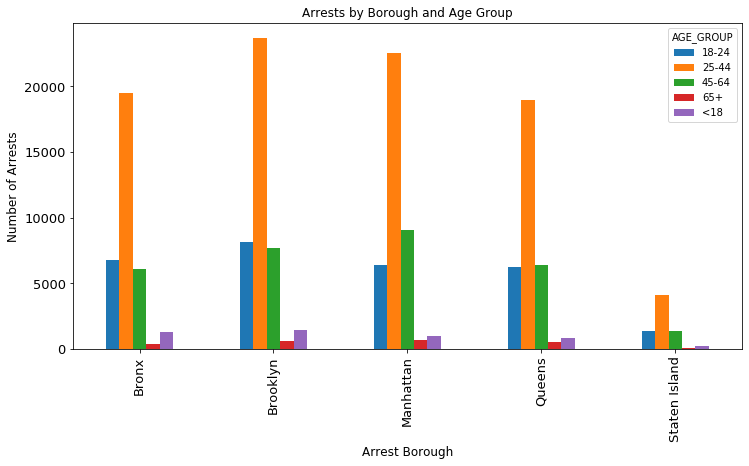

In [100]:
Arrest_Borough_Age = pd.pivot_table(df,values="ARREST_KEY",index="ARREST_BOROUGH_NAME",columns="AGE_GROUP",aggfunc=len)
ax = Arrest_Borough_Age.plot(kind='bar', figsize=(12,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Arrests by Borough and Age Group")
ax.set_xlabel("Arrest Borough", fontsize=12)
ax.set_ylabel("Number of Arrests", fontsize=12)